Dealing with missing values through scikit-learn.

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [6]:
# Load the dataset
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


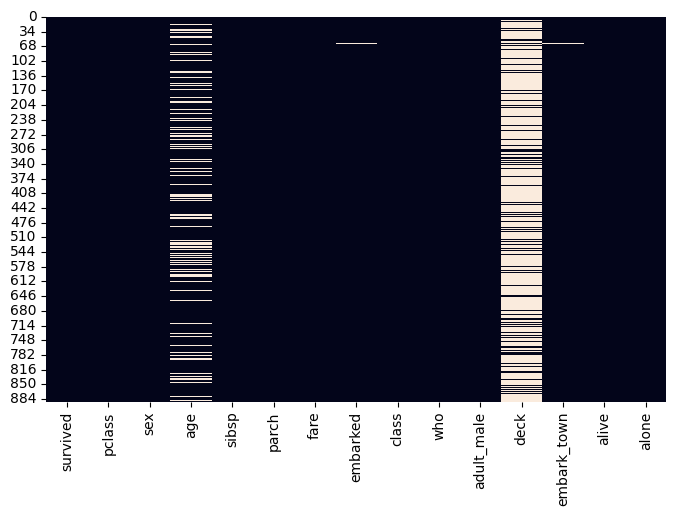

In [7]:

# Visualize the data
plt.figure(figsize=(8, 5))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [11]:
print(data.isnull().sum().sort_values(ascending= False))

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [15]:
round(data.isnull().sum()/ len(data)*100, 2).sort_values(ascending=False)

deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
survived        0.00
pclass          0.00
sex             0.00
sibsp           0.00
parch           0.00
fare            0.00
class           0.00
who             0.00
adult_male      0.00
alive           0.00
alone           0.00
dtype: float64

Use of Missingno Library

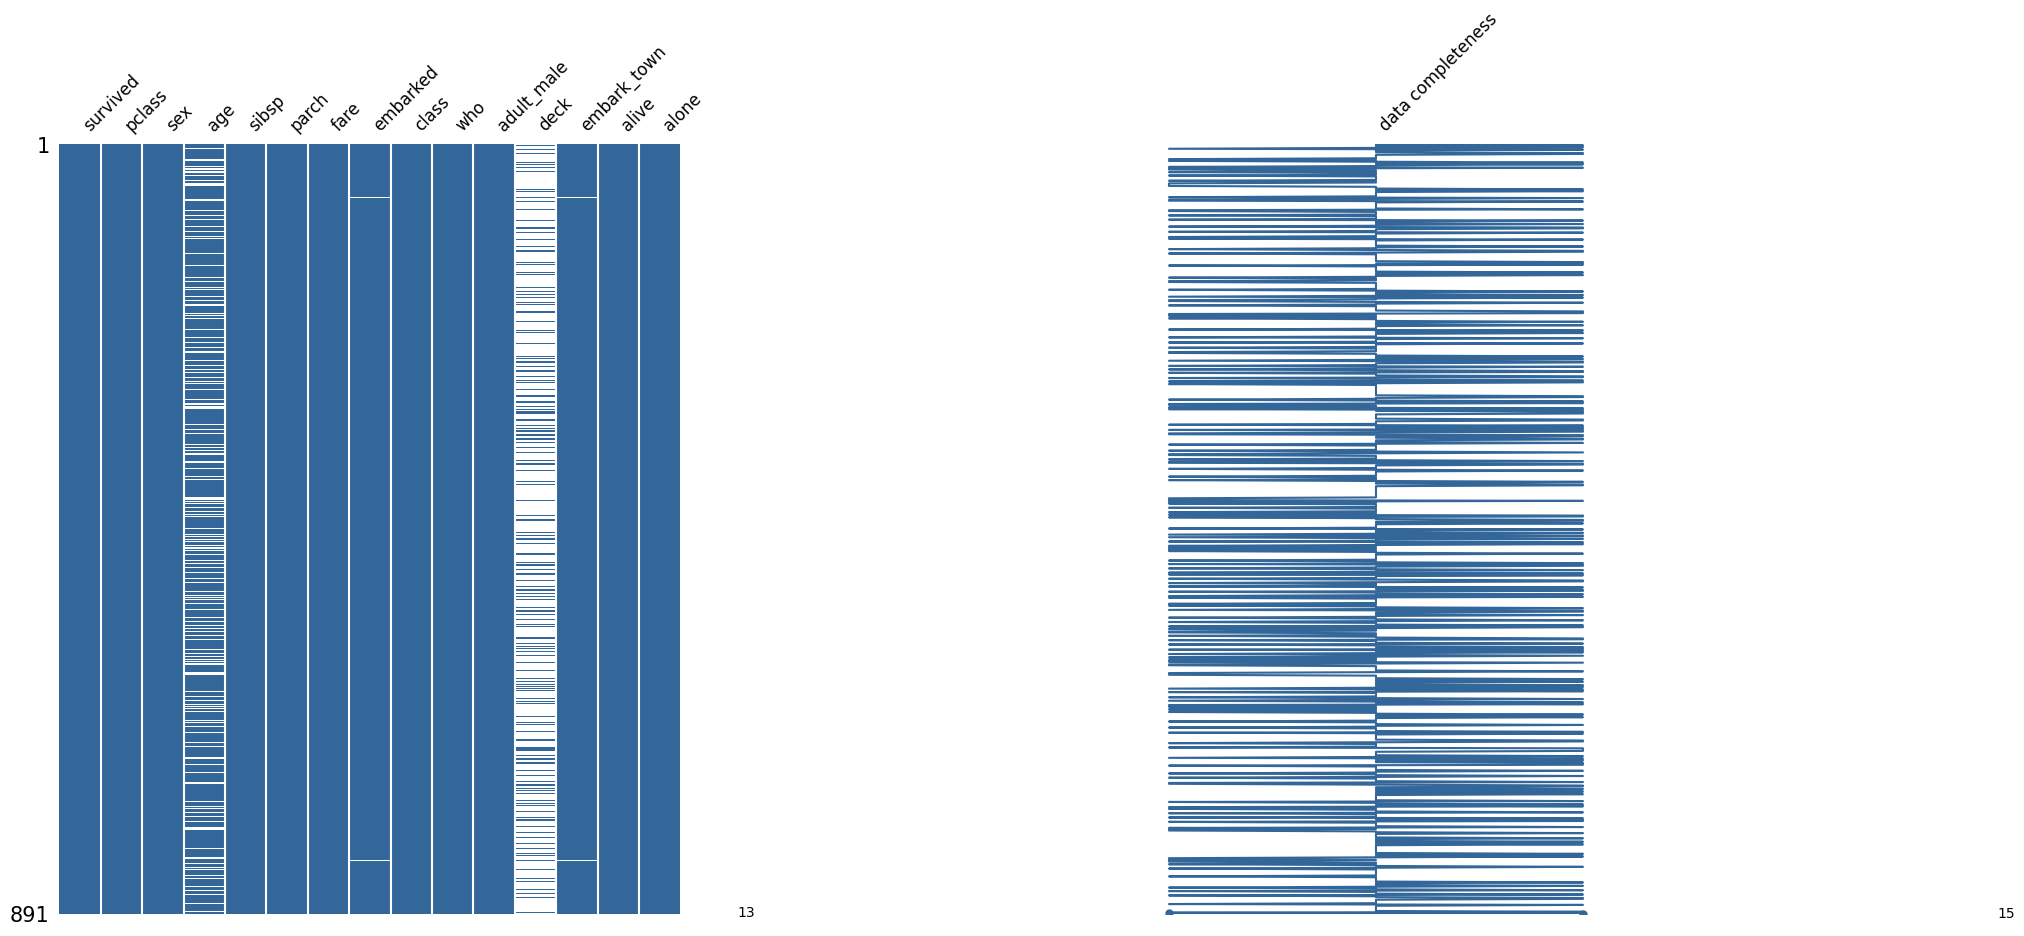

In [16]:
# Import libraries
import missingno as msno

# load titanic dataset
data = sns.load_dataset('titanic')
# Visualize the data
msno.matrix(data,labels=True, fontsize=12, width_ratios=(2, 4), color=(0.2, 0.4, 0.6))
plt.show()

In [19]:
round (data['age'].mean(), 2)

29.7

In [21]:
round(data['age'].median())

30

In [27]:
# Mean of age to fill age missing values
data ['age'] = data['age'].fillna(data['age'].median())


In [29]:
# Drop deck column

data.drop('deck', axis=1, inplace=True)

In [30]:
data.isnull().sum().sort_values(ascending=False)

embarked       2
embark_town    2
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
alive          0
alone          0
dtype: int64

In [31]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [32]:
# Replacing embaracked missing values with modes 
data ['embark_town'].mode()

0    Southampton
Name: embark_town, dtype: object

In [37]:
data ['embark_town'] = data['embark_town'].fillna(data['embark_town'].mode()[0])
data ['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])


In [47]:
data.isnull().sum().sort_values(ascending=False)


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

We can also impute through Sk-Learn


* Simple Imputation 


In [48]:
# Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns 

from sklearn.impute import SimpleImputer

In [62]:
df = sns.load_dataset('titanic')


In [60]:
# Impute aage column using simpleimputer from sklearn
imputer = SimpleImputer(strategy='median')
df['age'] = imputer.fit_transform(df[['age']])


In [61]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [63]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


* Multivariate Imputations


In [64]:
df  = sns.load_dataset('titanic')

In [65]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [66]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [69]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#impute age column using iterative imputer 
imputer = IterativeImputer(max_iter=100, initial_strategy='most_frequent', n_nearest_features=7)
df['age'] = imputer.fit_transform(df[['age']])

In [70]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

Forward and Backward fill method

* Forward Fill Method


In [71]:
df['age'] = df['age'].ffill()

In [72]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

* Backword Fill Method


In [73]:
df['age'] = df['age'].bfill()

In [74]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

KNN Imputer Method

In [76]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5 )
df['age']  = imputer.fit_transform(df[['age']])

In [78]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

Drop rows having missing values

In [79]:
df.dropna(inplace=True)

In [80]:
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     201 non-null    int64   
 1   pclass       201 non-null    int64   
 2   sex          201 non-null    object  
 3   age          201 non-null    float64 
 4   sibsp        201 non-null    int64   
 5   parch        201 non-null    int64   
 6   fare         201 non-null    float64 
 7   embarked     201 non-null    object  
 8   class        201 non-null    category
 9   who          201 non-null    object  
 10  adult_male   201 non-null    bool    
 11  deck         201 non-null    category
 12  embark_town  201 non-null    object  
 13  alive        201 non-null    object  
 14  alone        201 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 20.1+ KB
